In [35]:
import pandas as pd
import numpy as np

In [57]:
import matplotlib as plt
import seaborn as sns

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
df = pd.read_csv("measurements.csv")

In [82]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [84]:
df.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [85]:
df.isnull().sum()
# Las columnas Spacials, Refill Liters y Gas son prácticamente inválidas debido al gran número de NaNs que tienen


distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [86]:
df = df.drop('specials', axis=1)

In [87]:
df = df.drop('refill liters', axis=1)
df = df.drop('refill gas', axis=1)

In [88]:
df['gas_type'].unique()
# Solo dos tipos de gas, siendo E10 el de peor calidad

array(['E10', 'SP98'], dtype=object)

In [89]:
df['temp_inside'].unique()

array(['21,5', '22,5', '20', nan, '21', '20,5', '23', '23,5', '25', '24',
       '22', '19', '24,5', '25,5'], dtype=object)

In [90]:
# Cambiamos los valores NaNs por O
df[['temp_inside']] = df[['temp_inside']].fillna(value=0)

In [91]:
df.isnull().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

In [92]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,SP98,0,0,0
384,"16,1","4,3",38,25,31,SP98,1,0,0
385,16,"3,8",45,25,19,SP98,0,0,0
386,"15,4","4,6",42,25,31,SP98,1,0,0


In [93]:
df['rain'].unique()

array([0, 1])

In [94]:
df['sun'].unique()

array([0, 1])

In [95]:
df['speed'].max()

90

In [96]:
df['speed'].min()
# Podemos llegar a asumir que los datos están en millas por hora debido el rango de velocidades

14

In [97]:
# Cambiamos las comas por puntos en los valores numéricos
df["distance"] = df["distance"].str.replace(',','.')
df["consume"] = df["consume"].str.replace(',','.')
df["temp_inside"] = df["temp_inside"].str.replace(',','.')

In [98]:
# Convertimos strings en floats
df["distance"] = df["distance"].astype(str).astype(float)
df["consume"] = df["consume"].astype(str).astype(float)
df["temp_inside"] = df["temp_inside"].astype(str).astype(float)

In [99]:
# Guardámos datos limpios
df.to_csv("measurementsf.csv")

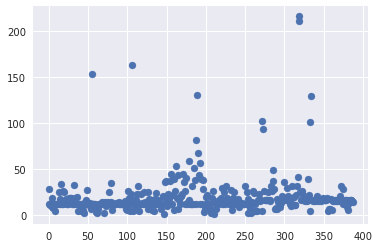

In [106]:
plt.scatter(df.index, df['distance'])
plt.show()
# La gran mayoría de los vehículos transcurren una distancia entre 10 y 40 millas o kilómetros.

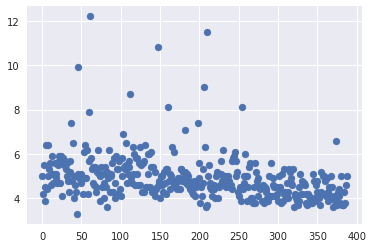

In [112]:
plt.scatter(df.index, df['consume'])
plt.show()
# La mayoría de los coches consumen entre 3 y 7 litros o otra medida por milla o kilómetro

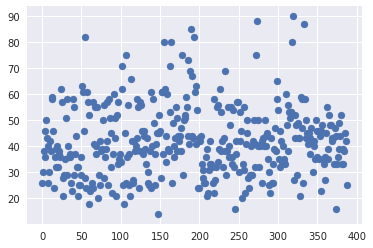

In [113]:
# La mayor varianza viene en las velocidades, concntradas en su mayoría entre 20 y 65
plt.scatter(df.index, df['speed'])
plt.show()

<AxesSubplot:xlabel='distance'>

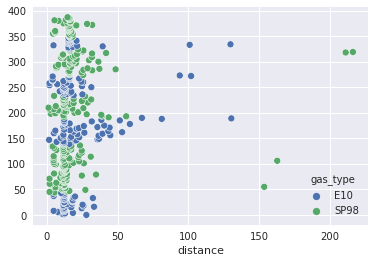

In [111]:
sns.scatterplot(x=df['distance'], y=df.index, hue=df['gas_type'])
# La gasolina SP98 ocupa una valor por arriba en distancia, es más eficiente, aunque se ve que está escalonado la distancia a la que se llega

<AxesSubplot:ylabel='distance'>

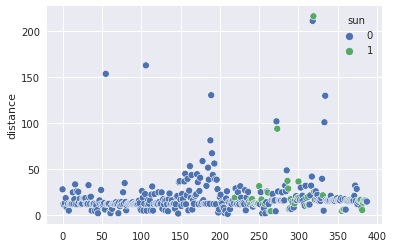

In [109]:
sns.scatterplot(x=df.index, y=df['distance'], hue=df['sun'])
# Se puede decir que los días soleados se ha podido recorrer más millas o kilómetros

<AxesSubplot:ylabel='distance'>

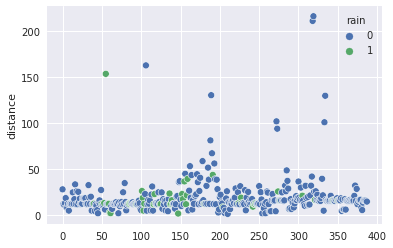

In [110]:
sns.scatterplot(x=df.index, y=df['distance'], hue=df['rain'])
# Lo contrario con lluvia, menos millas o kilómetros con lluvia

<AxesSubplot:ylabel='consume'>

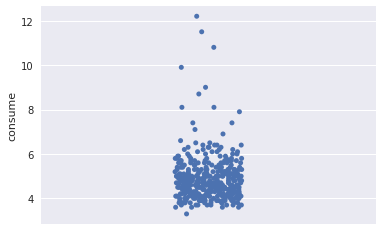

In [115]:
sns.stripplot(y=df['consume'])
# Mejor representación de la concentración de consumo

<AxesSubplot:ylabel='speed'>

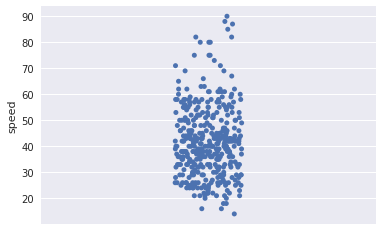

In [118]:
sns.stripplot(y=df['speed'])

<AxesSubplot:xlabel='gas_type', ylabel='speed'>

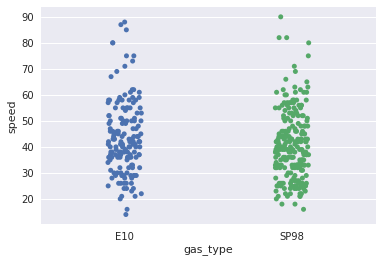

In [117]:
sns.stripplot(x=df['gas_type'], y=df['speed'])

<AxesSubplot:xlabel='AC', ylabel='speed'>

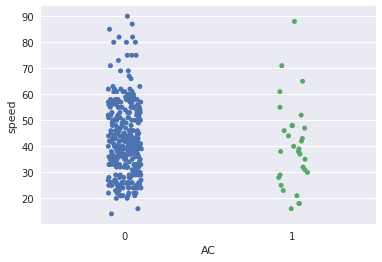

In [119]:
sns.stripplot(x=df['AC'], y=df['speed'])

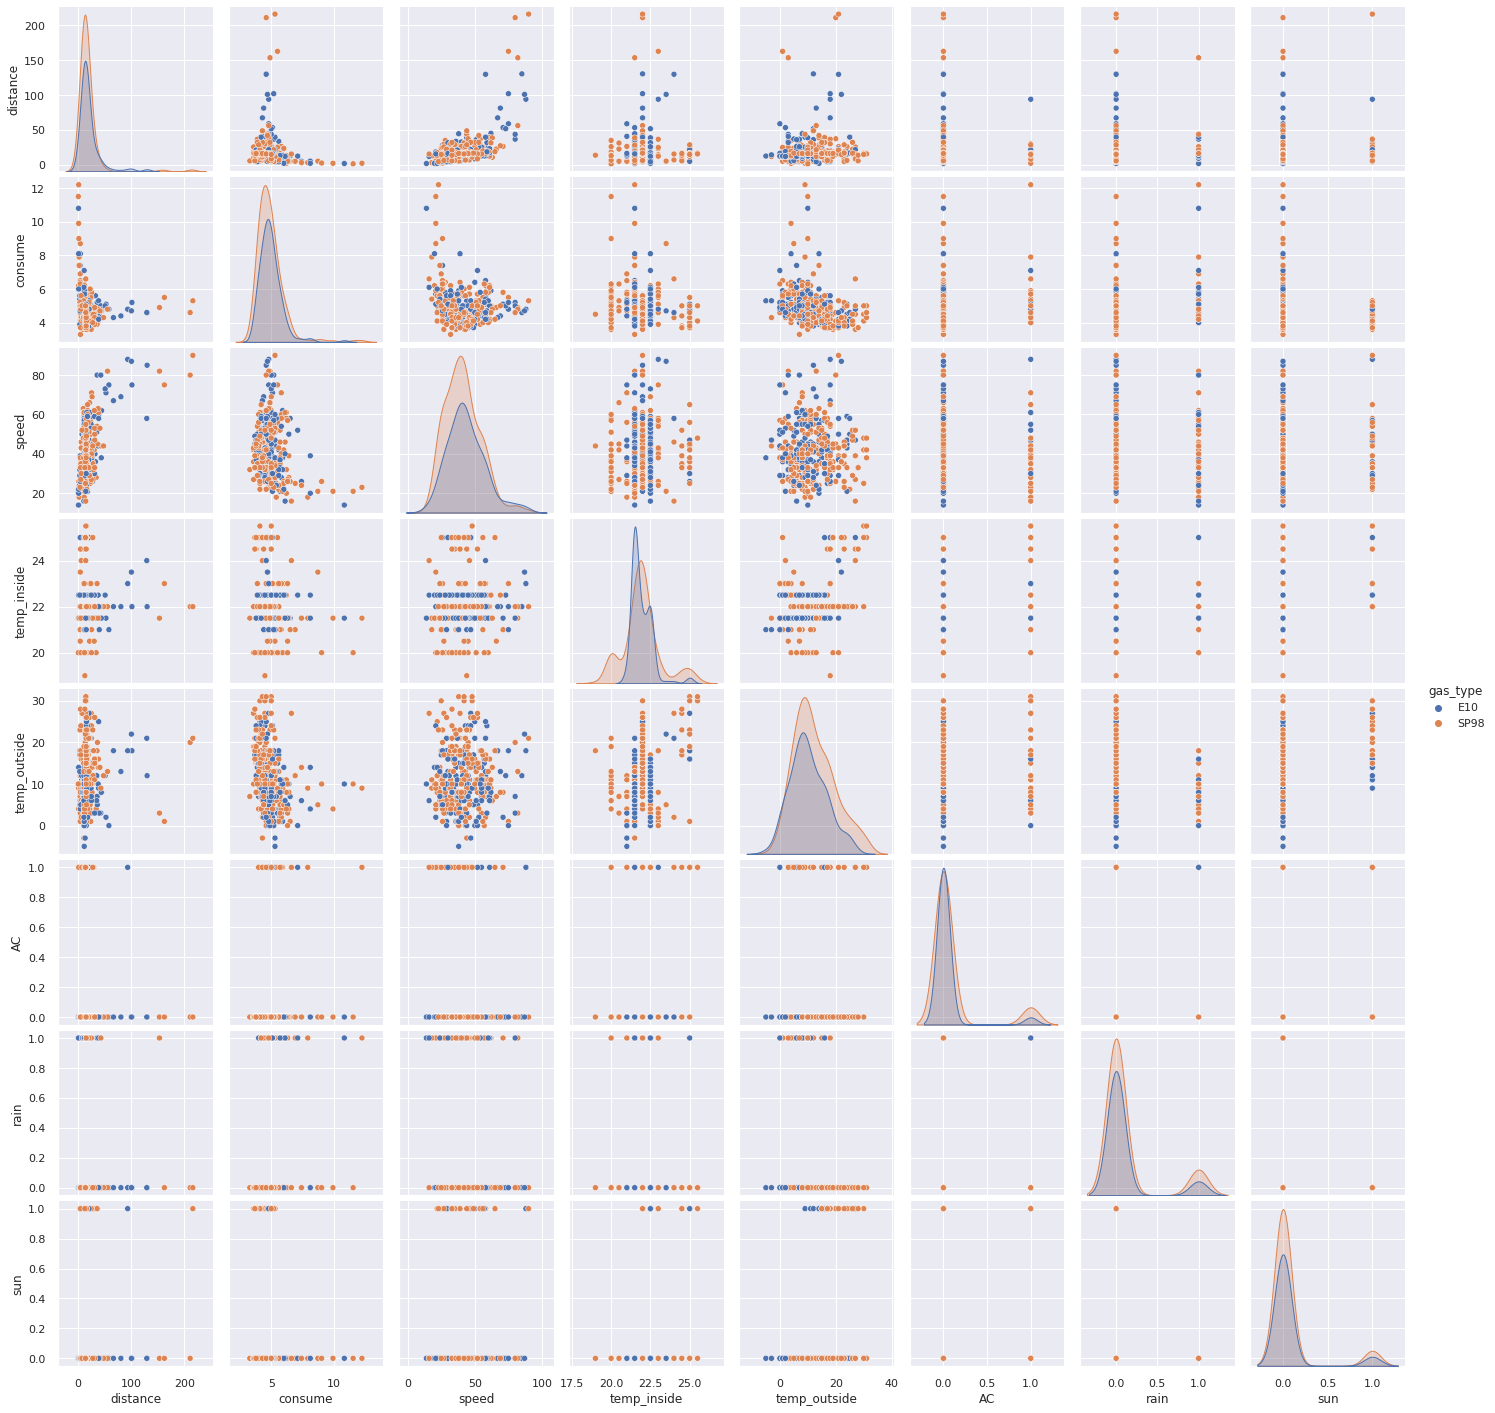

In [128]:
sns.pairplot(data=df, hue='gas_type')
# Relacionamos todos los valores a el tipo de gasolina con un pairplot ya que tenemos que decidir entre uno de los dos combustible

(array([311.,  59.,   7.,   2.,   3.,   1.,   1.,   2.,   0.,   2.]),
 array([  1.3 ,  22.78,  44.26,  65.74,  87.22, 108.7 , 130.18, 151.66,
        173.14, 194.62, 216.1 ]),
 <BarContainer object of 10 artists>)

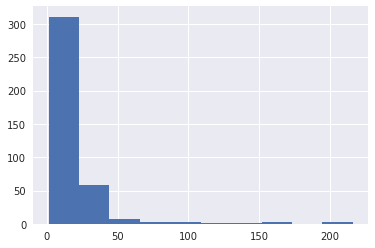

In [120]:
plt.hist(df['distance'])

(array([ 75., 184.,  93.,  23.,   4.,   3.,   2.,   1.,   1.,   2.]),
 array([ 3.3 ,  4.19,  5.08,  5.97,  6.86,  7.75,  8.64,  9.53, 10.42,
        11.31, 12.2 ]),
 <BarContainer object of 10 artists>)

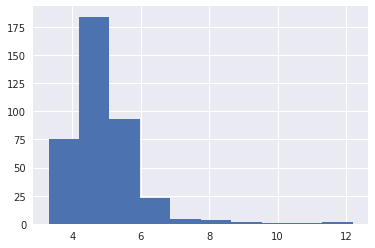

In [121]:
plt.hist(df['consume'])

(array([ 13.,  63.,  64., 109.,  51.,  53.,  18.,   5.,   8.,   4.]),
 array([14. , 21.6, 29.2, 36.8, 44.4, 52. , 59.6, 67.2, 74.8, 82.4, 90. ]),
 <BarContainer object of 10 artists>)

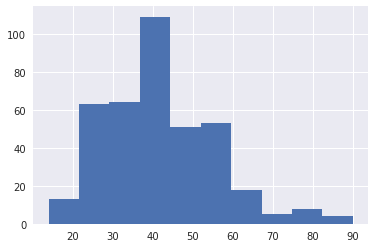

In [122]:
plt.hist(df['speed'])

In [124]:
dfcat = df.filter(["distance", "consume", "speed"], axis = 1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3b71297250>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3b71297070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3b70f96f40>,
 'medians': [<matplotlib.lines.Line2D at 0x7f3b71839910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3b71421e80>,
 'means': []}

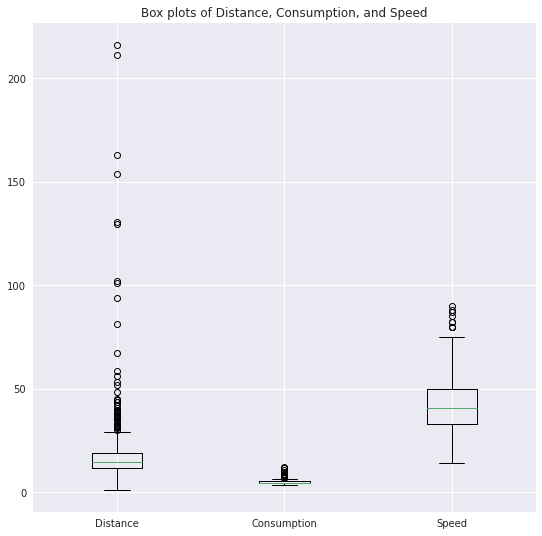

In [126]:
plt.figure(figsize=(9,9))
plt.title('Box plots of Distance, Consumption, and Speed')
plt.boxplot(dfcat.values, labels=['Distance', 'Consumption', 'Speed'])

<AxesSubplot:xlabel='variable', ylabel='value'>

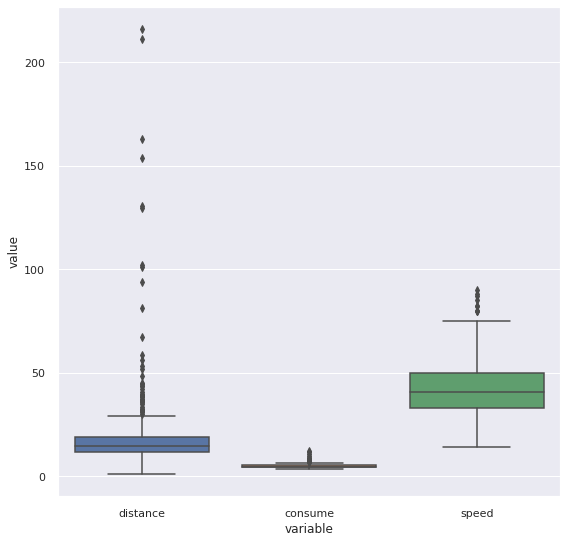

In [127]:
sns.set(rc={'figure.figsize': (9,9)})
sns.boxplot(x="variable", y="value", data=pd.melt(dfcat))

<AxesSubplot:ylabel='temp_inside'>

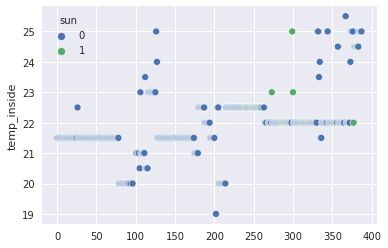

In [114]:
sns.scatterplot(x=df.index, y=df['temp_inside'], hue=df['sun'])

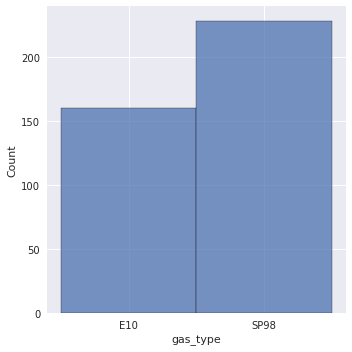

In [58]:
# Después de liberarnos de NaNs, avanzamos con visualización

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16, 9.0)
sns.displot(df["gas_type"], kde=False, bins=35)
# Tenemos números similares de coches con los dos tipos de combustible

In [60]:
pd.DataFrame(df.gas_type.value_counts())

,gas_type
SP98,228
E10,160


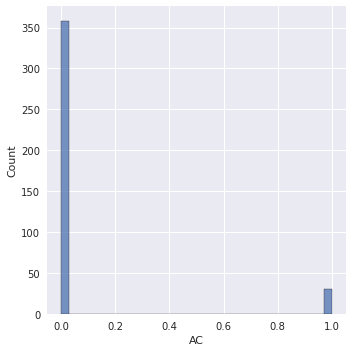

In [59]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16, 9.0)
sns.displot(df["AC"], kde=False, bins=35)
# Una clara diferencia de coches sin y con AC, asumiendo que 0 = no AC

In [61]:
pd.DataFrame(df.AC.value_counts())
# A pesar de que la empresa tenía en su mayoría coches de alta gama, la mayoría de estos no tienen AC, puede que por estar tuneados

,AC
0,358
1,30


In [11]:
df2 = pd.read_excel("measurements2.xlsx")

In [14]:
df2.to_csv("measurements2.csv")

In [15]:
df2

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN
